# Polynomial Regression Model - Position vs Salary

**Build a polynomial regression model to predict salary **

From: https://www.udemy.com/machinelearning

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import statsmodels.api as sm
import statsmodels.formula.api as smf
# from statsmodels.graphics.gofplots import qqplot
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Imports other notebooks
# import import_ipynb
# import regression_lib as rl

In [4]:
import sys
sys.path.insert(0, '../../src')
import regression_functions_utils as rfu

### Loading data

In [5]:
dtf = pd.read_csv('position_salaries.csv')
print(dtf)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


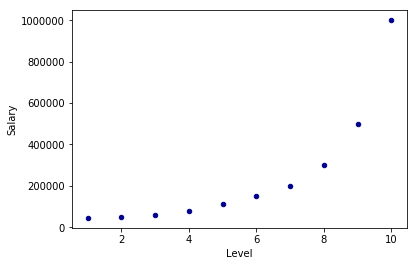

In [6]:
ax = dtf.plot.scatter(x='Level', y='Salary', c='DarkBlue')

### Polynomial Simple Linear Regression

In [7]:
y = dtf.Salary.values
X = dtf.Level.values.reshape(-1,1)
lm = LinearRegression()

In [8]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
lm_poly = lm.fit(X_poly, y)
poly_y_pred = lm_poly.predict(X_poly)

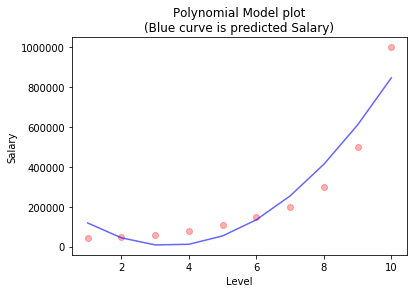

In [10]:
plt.scatter(X, y, color='r', alpha=.3)
plt.plot(X, poly_y_pred, color='blue', alpha=.6)
plt.title('Polynomial Model plot\n(Blue curve is predicted Salary)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

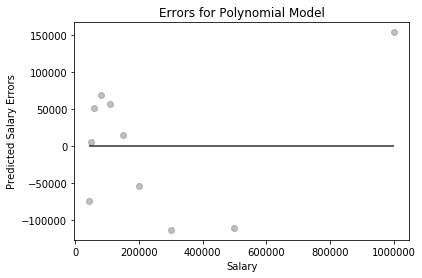

In [11]:
poly_y_pred_errors = y - poly_y_pred

plt.scatter(y, poly_y_pred_errors, color='gray', alpha=.5)
plt.hlines(0, min(y), max(y), color='black', alpha=.8)
plt.title('Errors for Polynomial Model')
plt.xlabel('Salary')
plt.ylabel('Predicted Salary Errors')
plt.show()

In [12]:
print('R2 = {} '.format(lm_poly.score(X_poly, y)))
print('Coef = {} '.format(lm_poly.coef_))

R2 = 0.9162082221443942 
Coef = [      0.         -132871.21212121   19431.81818182] 


## Building and evaluating the model with SMF and NumPy

In [17]:
degree = 3
weights = np.polyfit(dtf.Level, dtf.Salary, degree)
model = np.poly1d(weights)
ols_res = smf.ols(formula='Salary ~ model(Level)', data=dtf).fit()
y_poly_pred = ols_res.predict(dtf.Level)

In [18]:
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     417.8
Date:                Sat, 11 May 2019   Prob (F-statistic):           3.43e-08
Time:                        14:23:12   Log-Likelihood:                -119.88
No. Observations:                  10   AIC:                             243.8
Df Residuals:                       8   BIC:                             244.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.091e-09   1.84e+04  -5.93e-14   

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


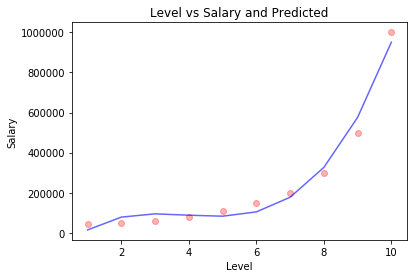

In [19]:
rfu.print_scatter_predicted(x=dtf.Level, y=dtf.Salary, y_pred=y_poly_pred,
                            x_name='Level', y_name='Salary', y_pred_name='Salary pred')

### Predicting Salary (OLS)

In [48]:
new_level = 7.5
tmp = ols_res.predict(exog=dict(Level=new_level))
new_level_pred_salary = tmp.values[0]
print('The predicted salary for level {} is ${:.0f}'.format(new_level, new_level_pred_salary))

The predicted salary for level 7.5 is $240915
